# Getting started with `skore`

# Introduction

The purpose of this guide is to illustrate some of the main features that `skore` provides. Please refer to our instructions for installing `skore`.

Given to you by [:probabl.](https://probabl.ai/), `skore` is a powerful tool that allows data scientists to create tracking and clear reports from their Python code, typically a notebook. For example, see [this HTML file](https://gist.github.com/augustebaum/6b21dbd7f7d5a584fbf2c1956692574e): download it and open it in your browser to visualize it.

## Imports

In [1]:
# ruff: noqa

import altair as alt
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import PIL

from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from skore import load
from skore.item import MediaItem

# Initialize and use a Project

To initialize a Project, we need to give it a name, or equivalently a file path. In your shell, run:
```bash
$ python -m skore create 'project.skore'
```
This will create a Skore project directory named "project.skore" in the current directory.

Now that you have created the `project.skore` folder (even though nothing has yet been stored), you can run the UI (in your project root i.e. where `project.skore` is) from your shell:
```python3
$ python -m skore launch project.skore
```

>*Note*: If you already had a `project.skore` directory from a previous run -- you can check for that in your shell by using:
>```python3
>$ ls
>```
>and if you no longer need it, we recommend deleting this folder by running `rm` in your shell:
>```python3
>$ rm -r project.skore
>```
>This deletion needs to be done before the cells above: before initializing the store and before launching the UI!

Now that the project file exists, we can load it in our notebook so that we can read from and write to it:

In [2]:
project = load("project.skore")

## Storing an integer

Now, let us store our first object, for example an integer:

In [3]:
project.put("my_int", 3)

Here, the name of my object is `my_int` and the integer value is 3.

You can read it from the Project:

In [4]:
project.get("my_int")

3

Careful; like in a traditional Python dictionary, the `put` method will *overwrite* past data if you use a key which already exists!

In [5]:
project.put("my_int", 30_000)

Let us check the updated value:

In [6]:
project.get("my_int")

30000

By using the `delete_item` method, you can also delete an object so that your `skore` UI does not become cluttered:

In [7]:
project.put("my_int_2", 10)

In [8]:
project.delete_item("my_int_2")

You can use `project.list_item_keys` to display all the keys in your project:

In [9]:
project.list_item_keys()

['my_int']

## Storing a string

We just stored a integer, now let us store some text using strings!

In [10]:
project.put("my_string", "Hello world!")

In [11]:
project.get("my_string")

'Hello world!'

`project.get` infers the type of the inserted object by default. For example, strings are assumed to be in Markdown format. Hence, you can customize the display of your text:

In [12]:
project.put(
    "my_string_2",
    (
        """Hello world!, **bold**, *italic*, `code`

```python
def my_func(x):
    return x+2
```
"""
    ),
)

Moreover, you can also explicitly tell `skore` the media type of an object, for example in HTML:

In [13]:
# Note we use `put_item` instead of `put`
project.put_item(
    "my_string_3",
    MediaItem.factory(
        "<p><h1>Title</h1> <b>bold</b>, <i>italic</i>, etc.</p>", media_type="text/html"
    ),
)

Note that the media type is only used for the UI, and not in this notebook at hand:

In [14]:
project.get("my_string_3")

b'<p><h1>Title</h1> <b>bold</b>, <i>italic</i>, etc.</p>'

You can also conveniently use Python f-strings:

In [15]:
x = 2
y = [1, 2, 3, 4]
project.put("my_string_4", f"The value of `x` is {x} and the value of `y` is {y}.")

## Storing many kinds of data

Python list:

In [16]:
my_list = [1, 2, 3, 4]
project.put("my_list", my_list)

Python dictionary:

In [17]:
my_dict = {
    "company": "probabl",
    "year": 2023,
}
project.put("my_dict", my_dict)

NumPy array:

In [18]:
my_arr = np.random.randn(3, 3)
project.put("my_arr", my_arr)

Pandas data frame:

In [19]:
my_df = pd.DataFrame(np.random.randn(3, 3))
project.put("my_df", my_df)

## Data visualization

Note that, in the dashboard, the interactivity of plots is supported, for example for `altair` and `plotly`.

Matplotlib figures:

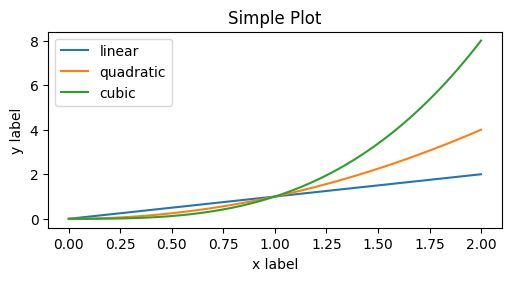

In [20]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
ax.plot(x, x, label="linear")
ax.plot(x, x**2, label="quadratic")
ax.plot(x, x**3, label="cubic")
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("Simple Plot")
ax.legend()
plt.show()

project.put("my_figure", fig)

Altair charts:

In [21]:
num_points = 100
df_plot = pd.DataFrame(
    {"x": np.random.randn(num_points), "y": np.random.randn(num_points)}
)

my_altair_chart = (
    alt.Chart(df_plot)
    .mark_circle()
    .encode(x="x", y="y", tooltip=["x", "y"])
    .interactive()
    .properties(title="My title")
)
my_altair_chart.show()

project.put("my_altair_chart", my_altair_chart)

alt.Chart(...)

Plotly figures:

In [22]:
my_plotly_fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
my_plotly_fig.show()
project.put("my_plotly_fig", my_plotly_fig)

PIL images:

In [23]:
pil_image = PIL.Image.new("RGB", (100, 100), color="red")
with io.BytesIO() as output:
    pil_image.save(output, format="png")

project.put("pil_image", pil_image)

## Scikit-learn models and pipelines

As `skore` is developed by :probabl., the spin-off of scikit-learn, `skore` treats scikit-learn models and pipelines as first-class citizens.

First of all, you can store a scikit-learn model:

In [24]:
my_model = Lasso(alpha=2)
project.put("my_model", my_model)

You can also store scikit-learn pipelines:

In [25]:
my_pipeline = Pipeline(
    [("standard_scaler", StandardScaler()), ("lasso", Lasso(alpha=2))]
)
project.put("my_pipeline", my_pipeline)

Moreover, you can store fitted scikit-learn pipelines:

In [26]:
diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
my_pipeline.fit(X, y)

project.put("my_fitted_pipeline", my_pipeline)

_Stay tuned for some new features!_

---
# Manipulating the skore UI

The following is just some `skore` strings that we generate in order to provide more context on the obtained report.

In [27]:
project.put_item(
    "my_comment_1",
    MediaItem.factory(
        "<p><h1>Welcome to skore!</h1>Given to you by :probabl., skore is a powerful tool that allows data scientists to create tracking and clear reports from their Python code, typically a notebook. This HTML document is actually a skore report generated using the `basic_usage.ipynb` notebook that has been exported (into HTML)!<p>",
        media_type="text/html",
    ),
)

In [28]:
project.put_item(
    "my_comment_2",
    MediaItem.factory("<p><h2>Integers</h1></p>", media_type="text/html"),
)

In [29]:
project.put_item(
    "my_comment_3", MediaItem.factory("<p><h2>Strings</h1></p>", media_type="text/html")
)

In [30]:
project.put_item(
    "my_comment_4",
    MediaItem.factory("<p><h2>Many kinds of data</h1></p>", media_type="text/html"),
)

In [31]:
project.put_item(
    "my_comment_5",
    MediaItem.factory("<p><h2>Altair plots</h1></p>", media_type="text/html"),
)

In [32]:
project.put_item(
    "my_comment_6",
    MediaItem.factory(
        "<p><h2>Scikit-learn models and pipelines</h1></p>", media_type="text/html"
    ),
)

In [33]:
project.put_item(
    "my_comment_7",
    MediaItem.factory(
        "<p><h2>Manipulating the skore report</h1></p>", media_type="text/html"
    ),
)

In [34]:
project.put_item(
    "my_comment_8",
    MediaItem.factory(
        "<p>Once you have created cells in your Skore report, you can place them where you want: move them up or down, delete them, for example put one to the left of a graph to comment on it.</p>",
        media_type="text/html",
    ),
)